In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df = pd.read_csv('/kaggle/input/9000-movies-dataset/mymoviedb.csv', lineterminator='\n')

In [4]:
#Viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
# Exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
# Check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [7]:
# Exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [9]:
#Data Cleaning: Casting Release_Date column and extracting year values
df['Release_Date'] = pd.to_datetime(df['Release_Date'])  # Casting to datetime
print(df['Release_Date'].dtypes)  # Confirming changes

df['Release_Date'] = df['Release_Date'].dt.year  # Extracting year
print(df['Release_Date'].dtypes)  # Confirming changes

df.info()

datetime64[ns]
int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [10]:
#Dropping unnecessary columns
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)
print(df.columns)

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


In [12]:
# Defining function to categorize Vote_Average
def catigorize_col(df, col, labels):
    """
    Categorizes a certain column based on its quartiles
    """
    edges = [df[col].min(), df[col].quantile(0.25), df[col].quantile(0.5), df[col].quantile(0.75), df[col].max()]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [13]:
# Define labels for Vote_Average categories
labels = ['not_popular', 'below_avg', 'average', 'popular']

In [14]:
# Categorize Vote_Average column
catigorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [15]:
# Confirming changes
print(df['Vote_Average'].unique())

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [16]:
# Exploring Vote_Average column
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [17]:
# Dropping NaNs
df.dropna(inplace=True)

In [18]:
#Confirming no NaNs
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [20]:
# Splitting genres into a list and exploding the dataframe
df['Genre'] = df['Genre'].str.split(',')  # Split the strings into lists
df = df.explode('Genre').reset_index(drop=True)  # Explode the lists

In [22]:
# Casting Genre column to category
df['Genre'] = df['Genre'].astype('category')

In [23]:
# Confirming changes
print(df['Genre'].dtypes)

category


In [24]:
# Viewing dataset info after transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 750.3+ KB


In [25]:
#Checking unique values in each column
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             38
dtype: int64

In [26]:
# Setting up seaborn configurations
sns.set_style('whitegrid')

In [27]:
# Q1: What is the most frequent genre in the dataset?
df['Genre'].describe()

count         25552
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

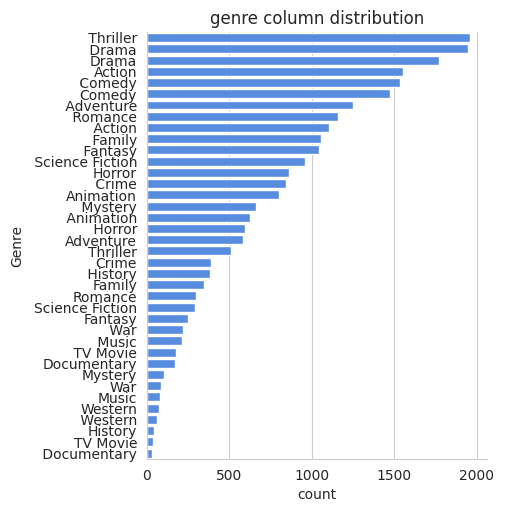

In [28]:
# Visualizing genre column
sns.catplot(y='Genre', data=df, kind='count', 
            order=df['Genre'].value_counts().index, 
            color='#4287f5')
plt.title('genre column distribution')
plt.show()

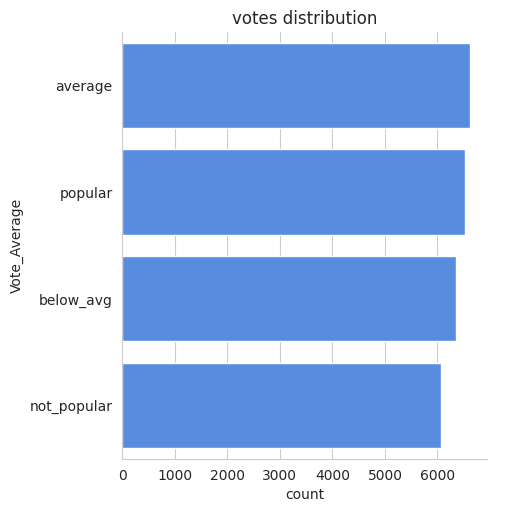

In [29]:
# Q2: Visualizing Vote_Average distribution
sns.catplot(y='Vote_Average', data=df, kind='count', 
            order=df['Vote_Average'].value_counts().index, 
            color='#4287f5')
plt.title('votes distribution')
plt.show()

In [30]:
# Q3: What movie got the highest popularity? What's its genre?
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [31]:
#Q4: What movie got the lowest popularity? What's its genre?
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction
